In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install koreanize-matplotlib

In [3]:
titanic_df = pd.read_csv('C:/Users/USER/Downloads/LS_Project/titanic/train.csv')
test_df = pd.read_csv('C:/Users/USER/Downloads/LS_Project/titanic/test.csv')
sub_df = pd.read_csv('C:/Users/USER/Downloads/LS_Project/titanic/gender_submission.csv')
df = pd.concat([titanic_df, test_df], axis = 0)

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [6]:
dic = dict(zip(df['Ticket'].value_counts().index, df['Ticket'].value_counts().values))
df['Passengers'] = df['Ticket'].replace(dic)

In [7]:
titanic_df = df[:891]
test_df = df[891:]

In [8]:
# 전처리 함수
def preprocess(df):
    df['Title']=df['Name'].str.split(', ').str[1].str.split('.').str[0]
    
    age_median1 = df.groupby(['Pclass', 'Sex'])['Age'].median()
    
    df['Age'] = df.apply(lambda row: age_median1[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)
    
    df['Family'] = df['SibSp'] + df['Parch']
    
#     dic = dict(zip(df['Ticket'].value_counts().index, df['Ticket'].value_counts().values))
#     df['Passengers'] = df['Ticket'].replace(dic)
    
    df['Embarked'] = df['Embarked'].fillna('S')
    
    df['Fare'] = np.where(df['Fare']>500, np.nan, df['Fare'])
    df['Fare'] = df['Fare'].fillna(df['Fare'].max())
    
    return df

In [9]:
# embarked, title 라벨인코딩
def change_object(train_df):
    from sklearn.preprocessing import LabelEncoder
    ordinal_features = ['Embarked','Title']

    for feature in ordinal_features:
        le = LabelEncoder()
        le = le.fit(train_df[feature])
        train_df[feature] = le.transform(train_df[feature])
    return train_df

In [10]:
# 불필요한 열 삭제
def remove_col(df):
    df.drop('PassengerId', axis=1, inplace = True)
    df.drop('Name', axis=1, inplace = True)
    df.drop('Ticket', axis=1, inplace = True)
    df.drop('Cabin', axis=1, inplace = True)

In [11]:
titanic_df = preprocess(titanic_df)
test_df = preprocess(test_df)

In [12]:
remove_col(titanic_df)
remove_col(test_df)

In [13]:
titanic_df = change_object(titanic_df)
test_df = change_object(test_df)

In [14]:
titanic_df = pd.get_dummies(titanic_df)
test_df = pd.get_dummies(test_df)

In [15]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Passengers,Title,Family,Sex_female,Sex_male
0,0.0,3,22.0,1,0,7.2500,2,1,11,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,2,12,1,1,0
2,1.0,3,26.0,0,0,7.9250,2,1,8,0,1,0
3,1.0,1,35.0,1,0,53.1000,2,2,12,1,1,0
4,0.0,3,35.0,0,0,8.0500,2,1,11,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,2,1,14,0,0,1
887,1.0,1,19.0,0,0,30.0000,2,1,8,0,1,0
888,0.0,3,21.5,1,2,23.4500,2,4,8,3,1,0
889,1.0,1,26.0,0,0,30.0000,0,1,11,0,0,1


In [16]:
test_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Passengers,Title,Family,Sex_female,Sex_male
0,NaN,3,34.5,0,0,7.8292,1,1,5,0,0,1
1,NaN,3,47.0,1,0,7.0000,2,1,6,1,1,0
2,NaN,2,62.0,0,0,9.6875,1,1,5,0,0,1
3,NaN,3,27.0,0,0,8.6625,2,1,5,0,0,1
4,NaN,3,22.0,1,1,12.2875,2,2,6,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,24.0,0,0,8.0500,2,1,5,0,0,1
414,NaN,1,39.0,0,0,108.9000,0,3,1,0,1,0
415,NaN,3,38.5,0,0,7.2500,2,1,5,0,0,1
416,NaN,3,24.0,0,0,8.0500,2,1,5,0,0,1


In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int32  
 7   Passengers  891 non-null    int64  
 8   Title       891 non-null    int32  
 9   Family      891 non-null    int64  
 10  Sex_female  891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
dtypes: float64(3), int32(2), int64(5), uint8(2)
memory usage: 71.3 KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    0 non-null      float64
 1   Pclass      418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    int32  
 7   Passengers  418 non-null    int64  
 8   Title       418 non-null    int32  
 9   Family      418 non-null    int64  
 10  Sex_female  418 non-null    uint8  
 11  Sex_male    418 non-null    uint8  
dtypes: float64(3), int32(2), int64(5), uint8(2)
memory usage: 33.5 KB


In [19]:
X_train = titanic_df.drop(['Survived'], axis = 1)
y_train = titanic_df['Survived']
X_test = test_df.drop(['Survived'], axis = 1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 16],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 10, n_jobs = -1, return_train_score=True, verbose = 0)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             return_train_score=True)

In [21]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'train_score : {grid_cv.score(X_train, y_train)}', f'test_score : {grid_cv.best_score_}')

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
train_score : 0.8574635241301908 test_score : 0.8339200998751559


In [22]:
gc = grid_cv.best_estimator_

In [23]:
pred = gc.predict(X_test)
sub_df['Survived'] = pred.astype('int')

In [24]:
sub_df.to_csv('submission.csv', index = False)

In [25]:
submission = pd.read_csv('submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


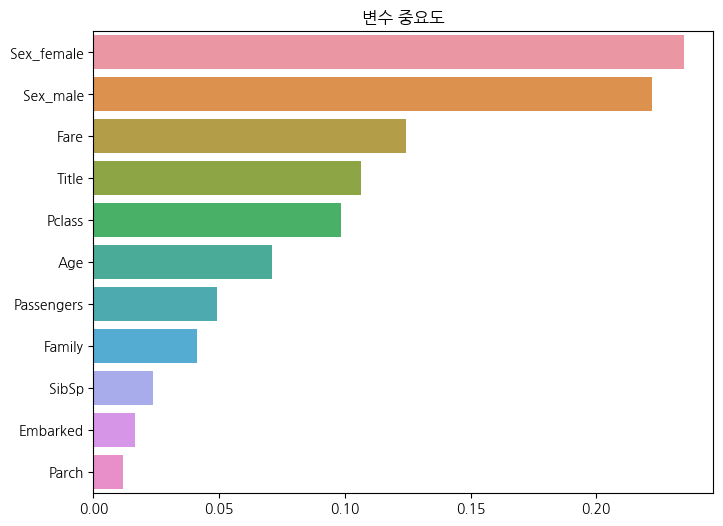

In [26]:
ftr_importances_values = gc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('변수 중요도')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

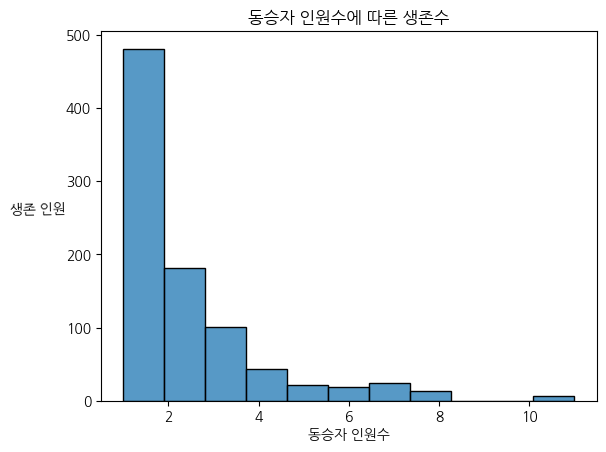

In [36]:
sns.histplot(titanic_df, x='Passengers', bins=11, color='#1f77b4')
plt.grid(False)
plt.title('동승자 인원수에 따른 생존수')
plt.xlabel('동승자 인원수')
plt.ylabel('생존 인원', rotation = True, labelpad = 20)
plt.show()

In [88]:
titanic_df['Survived'] = titanic_df['Survived'].astype('int')

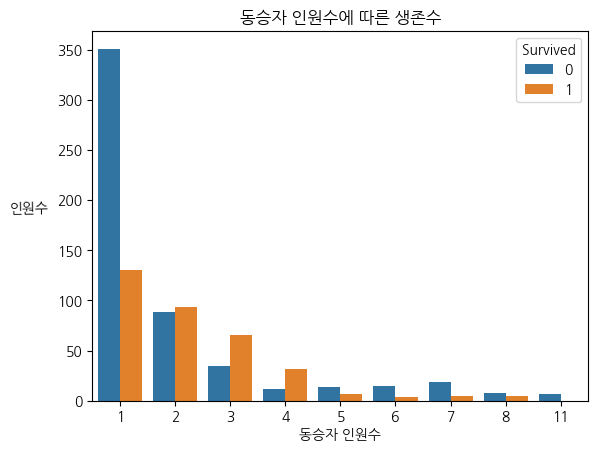

In [90]:
sns.countplot(x='Passengers', data = titanic_df, hue = 'Survived')
plt.grid(False)
plt.title('동승자 인원수에 따른 생존수')
plt.xlabel('동승자 인원수')
plt.ylabel('인원수', rotation = True, labelpad = 20)
plt.show()

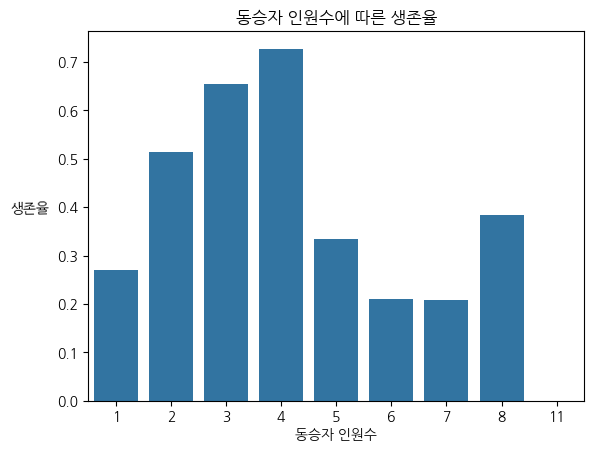

In [37]:
sns.barplot(x='Passengers', y = 'Survived', data = titanic_df, color='#1f77b4', ci = False)
plt.grid(False)
plt.title('동승자 인원수에 따른 생존율')
plt.xlabel('동승자 인원수')
plt.ylabel('생존율', rotation = True, labelpad = 20)
plt.show()

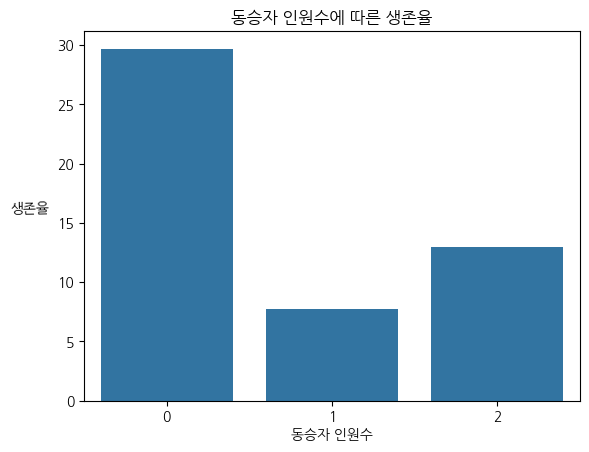

In [93]:
sns.barplot(x='Embarked', y = 'Fare', data = titanic_df, estimator = 'median', color='#1f77b4', ci = False)
plt.grid(False)
plt.title('동승자 인원수에 따른 생존율')
plt.xlabel('동승자 인원수')
plt.ylabel('생존율', rotation = True, labelpad = 20)
plt.show()

Text(0, 0.5, '생존율')

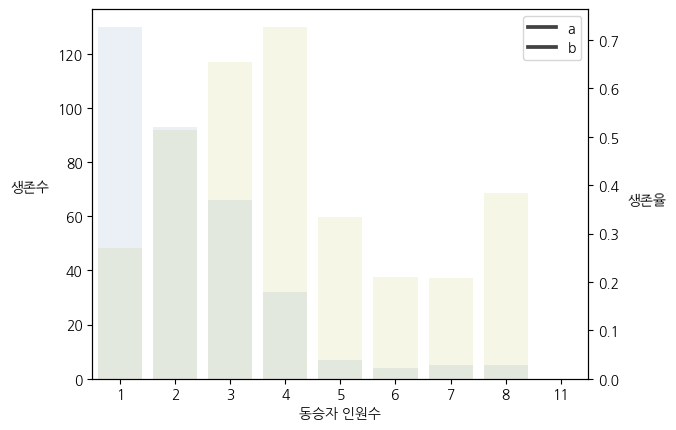

In [64]:
fig, axe1 = plt.subplots()

axe2 = axe1.twinx()

c1 = sns.barplot(ax = axe1, data = titanic_df, x = 'Passengers', y = 'Survived', estimator = 'sum', ci = False, color='#1f77b4', alpha = 0.1)
c2 = sns.barplot(ax = axe2, data = titanic_df, x = 'Passengers', y = 'Survived', ci = False, color='y', alpha = 0.1)

axe1.legend(['a', 'b'])

axe1.set_xlabel('동승자 인원수')
axe1.set_ylabel('생존수', rotation = True, labelpad = 20)
axe2.set_ylabel('생존율', rotation = True, labelpad = 20)

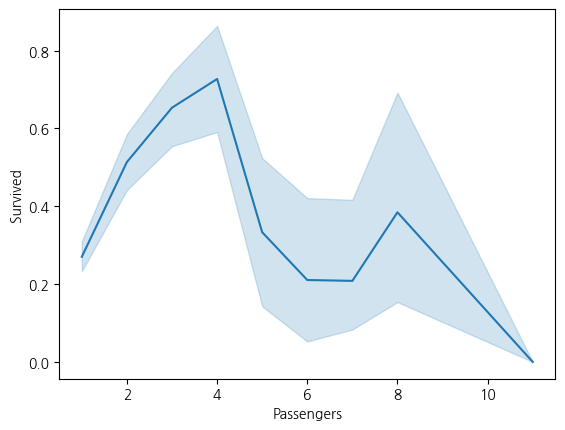

In [60]:
fig, axe1 = plt.subplots()
c2 = sns.lineplot(ax = axe1, data = titanic_df, x = 'Passengers', y = 'Survived')

In [48]:
Survival_Ratio = titanic_df.groupby('Passengers')['Survived'].sum()/titanic_df.groupby('Passengers')['Survived'].count()

In [75]:
len(Survival_Ratio)

9

AttributeError: Rectangle.set() got an unexpected keyword argument 'estimator'

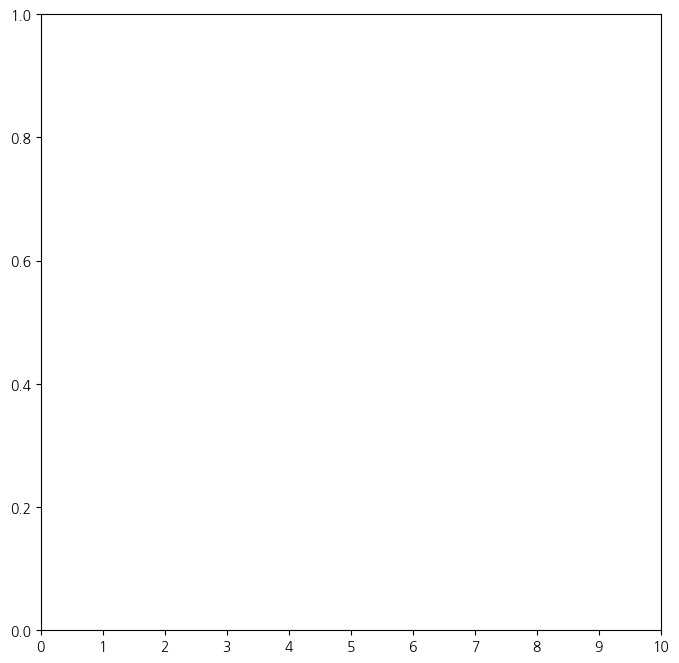

In [74]:
fig = plt.figure(figsize=(8,8)) ## Figure 생성 
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('summer') ## 바 차트 색상
 
xtick_label_position = list(range(11)) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
# ax1.set_xticklabels(day) ## x축 눈금 라벨
ax1.bar(x = 'Passengers', height = 'Survived', data = titanic_df, color=colors, estimator = 'sum') ## 바차트 출력
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(titanic_df['Passengers'], titanic_df['Survived'], color=color, linestyle='--', marker='o') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
 
plt.title('Sales Icecream and Temperature for Days', fontsize=20)
plt.show()